# Youtube Luxury Comment Data Analysis

## 1. Loading Modules and Raw Data

In [83]:
import os
import numpy as np
import pandas as pd


In [88]:
import matplotlib as mpl
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

In [85]:
path = 'data/' 

In [86]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
os.listdir(path)

['.ipynb_checkpoints',
 'Uncleaned_Merged_Youtube_Comments.csv',
 'youtube_luxury_comments.csv']

In [4]:
raw_comments_df = pd.read_csv(path + 'youtube_luxury_comments.csv')

In [5]:
df = raw_comments_df

## 2. Basic Cleaning of the Data

### 2-1. Eyeballing Data

In [6]:
df.head()

,authorDisplayName,textDisplay,videoId,id,publishedAt,updatedAt
0,한별Hanbyul,안녕하세요!\r\n드디어 명품하울 2탄~💸 영상을 들고 왔어요!\r\n요 며칠 몸이...,yjr2Iaj8Ogc,Ugw_TQ6FrU_0YioBflJ4AaABAg,2018-10-04T09:29:10Z,2018-10-04T09:29:10Z
1,이경민,한별님 한별님이 명품 하울 찍을 때 마다 안녕하세요 한별 입니다 오늘은 여러분들...,yjr2Iaj8Ogc,Ugw_TQ6FrU_0YioBflJ4AaABAg.8lyuCzG-Tsx9AOXDnDoBTR,2020-06-27T02:43:54Z,2020-06-27T02:43:54Z
2,샘조,직업이 따로 있으시나요?,yjr2Iaj8Ogc,Ugw_TQ6FrU_0YioBflJ4AaABAg.8lyuCzG-Tsx96LwYPV4XVf,2020-03-18T16:30:37Z,2020-03-18T16:30:37Z
3,minji seong,덕분에 명품에 대해 1도 몰랐었는데 많이 구경하고 가요\r\n특히 중간에 로고 의미...,yjr2Iaj8Ogc,Ugw_TQ6FrU_0YioBflJ4AaABAg.8lyuCzG-Tsx94lxV3vfpjS,2020-02-08T11:15:36Z,2020-02-08T11:15:36Z
4,서현,샤넬가방 진짜 이뻐요 ㅠㅠ,yjr2Iaj8Ogc,Ugw_TQ6FrU_0YioBflJ4AaABAg.8lyuCzG-Tsx94G-kicDAwt,2020-01-26T16:09:09Z,2020-01-26T16:09:09Z


Check if there are NaN Values or Null Values

In [7]:
df[df['textDisplay'] == 'NaN']

,authorDisplayName,textDisplay,videoId,id,publishedAt,updatedAt


In [8]:
df.loc[df['textDisplay'].isnull() != False]

,authorDisplayName,textDisplay,videoId,id,publishedAt,updatedAt


In [9]:
# Check length
len(df), len(df['videoId'].unique()), len(df['authorDisplayName'].unique())

(15120, 23, 11002)

### 2-2. Cleaning Video Author Data
We found a need to delete author's comments.

In [10]:
df['authorDisplayName'].value_counts(sort=True, ascending=False).head(10)
# ex) 로즈하, 아옳이, 한별...

ᄋᄋ           84
로즈하ROSEHA    40
아옳이          20
ᄋᄋᄋ          19
성이름          19
지구젤리         19
유진           19
김민재          18
한별Hanbyul    17
지은           15
Name: authorDisplayName, dtype: int64

#### Get Author Display Names from Youtube

In [19]:
from pytube import YouTube

author_list = list()
video_author_dict = dict()

for video_id in df['videoId'].unique():
    author = YouTube('https://www.youtube.com/watch?v=' + str(video_id)).author
    author_list.append(author)
    video_author_dict[video_id] = author
    
author_list = np.unique(author_list)

In [20]:
author_list = list(np.unique(author_list))

In [11]:
author_list 

#### Clear Comments from Author

In [12]:
for author in author_list:
    df.drop(df.loc[df['authorDisplayName'] == author].index, inplace = True)

In [13]:
df['authorDisplayName'].value_counts(sort=True, ascending=False).head(10)

ᄋᄋ         84
유진         19
지구젤리       19
ᄋᄋᄋ        19
성이름        19
김민재        18
김지은        15
지은         15
hoho ho    14
김민지        13
Name: authorDisplayName, dtype: int64

#### Delete Duplicate Comments from Same Commentor

In [14]:
df.drop_duplicates(subset = ['authorDisplayName', 'textDisplay'])

,authorDisplayName,textDisplay,videoId,id,publishedAt,updatedAt
1,이경민,한별님 한별님이 명품 하울 찍을 때 마다 안녕하세요 한별 입니다 오늘은 여러분들...,yjr2Iaj8Ogc,Ugw_TQ6FrU_0YioBflJ4AaABAg.8lyuCzG-Tsx9AOXDnDoBTR,2020-06-27T02:43:54Z,2020-06-27T02:43:54Z
2,샘조,직업이 따로 있으시나요?,yjr2Iaj8Ogc,Ugw_TQ6FrU_0YioBflJ4AaABAg.8lyuCzG-Tsx96LwYPV4XVf,2020-03-18T16:30:37Z,2020-03-18T16:30:37Z
3,minji seong,덕분에 명품에 대해 1도 몰랐었는데 많이 구경하고 가요\r\n특히 중간에 로고 의미...,yjr2Iaj8Ogc,Ugw_TQ6FrU_0YioBflJ4AaABAg.8lyuCzG-Tsx94lxV3vfpjS,2020-02-08T11:15:36Z,2020-02-08T11:15:36Z
4,서현,샤넬가방 진짜 이뻐요 ㅠㅠ,yjr2Iaj8Ogc,Ugw_TQ6FrU_0YioBflJ4AaABAg.8lyuCzG-Tsx94G-kicDAwt,2020-01-26T16:09:09Z,2020-01-26T16:09:09Z
5,깡뚱,진짜넘나이쁘네요.말도 되게조곤조곤 잘하시는것같아요ㅎㅎ 뭔가 패션을이해하고 사랑하시는...,yjr2Iaj8Ogc,Ugw_TQ6FrU_0YioBflJ4AaABAg.8lyuCzG-Tsx9-pEcM0divf,2019-10-08T11:14:46Z,2019-10-08T11:14:46Z
...,...,...,...,...,...,...
15115,하이하,언니는 진짜 인간자체명품이에요ㅠ,j3Ybe36WTJI,Ugy1de5o2zYAvBXhyJd4AaABAg.99-VwLKoLqf990FnTh628a,2020-05-23T19:58:27Z,2020-05-23T19:58:27Z
15116,김나연,1번째 댯글~!!!,j3Ybe36WTJI,Ugw_pfSQfPBU1PFFCKN4AaABAg,2020-05-23T13:00:11Z,2020-05-23T13:00:11Z
15117,한세린,"꺄앙ㄱ 언니💗💗1빠,,, ㅠ",j3Ybe36WTJI,UgwLCCPakNBzqYvpK9x4AaABAg,2020-05-23T13:00:08Z,2020-05-23T13:01:04Z
15118,purple lee,1빠다,j3Ybe36WTJI,UgzILto-rqaWHLLkhPZ4AaABAg,2020-05-23T13:00:04Z,2020-05-23T13:00:04Z


### 2-3. Aggregate Comments of Video

In [15]:
Merged_df = pd.pivot_table(df, values='textDisplay', index='videoId', aggfunc = lambda x : ''.join(x))

In [34]:
Merged_df = Merged_df.rename(columns={'textDisplay' : 'mergedComments'})

In [17]:
with pd.option_context('display.max_colwidth', None):
    display(Merged_df.iloc[0])

textDisplay    알고리즘에 의해 보게 되었는데 아옳이님 정말 매력적이시네요!!\r\n옷을 정말 사랑하시는 분 같은데 혹시 나중에 생활 팁으로 '옷 세탁 컨텐츠'도 찍어주시면 정말 좋을 것 같아요\r\n영상 잘 보고 있습니다 감사합니다^^여러분 이거 아무나 사지 마세욧..! 이분이어서 어울리는거니까..☆☆  \r\n선남선녀커플 등급♡♡이 집 옷이 이쁘네요.ㅋㅋㅋ거적대기를 입어두이쁠언냐..남이 옷입는게 이렇게 사랑스럽고 예쁠일인가여 ㅠㅅㅠ넘 재밌어요 😍😍😍😍\r\n저 매장 룩 진짜 이쁘다요 🤎🤎민트옷이 넘 잘어울려요,,한국은 사이즈가m까지만 들어오는군요ㅠ하나하나가 다 레전드네 미쳤다리 ㅠ다 잘 어울려오이언니 진쨔 너무 이뿌고 귀엽댴옷은 정말 이쁜데!! 가격은 그리 이쁘지 않아...ㅋㅋ아언니진짜진심너무구ㅏ엽다 미쳣어 너무기여워 신나서 랄랄라하는 공주님같네 ㅠㅠㅠ세상에 옷 입을 맛 나시겠어요 ㅜㅜㅠ 부러워요명품매장이나 저런백화점 매장에서 대놓고 사진촬영 못하지않나요?  광고성이 아닌이상?능력있고 예쁘고 돈 잘벌고 잘생긴 남편 뒀고 ... 와 언니는 정말 최고에여 ... ❤️❤️옷들이 다너무 예쁘고 좋은데 세탁을 어찌  하실찌?ㅜㅜ협챠늊ㄴㅉ진짜 이언니 너무 사랑스럽다...❤️옷 진짜 이쁘다잘어울리는 원피스 진짜 많앗다요!! 저렇게 돈쓰는데 하루가 쟈미없을수가 없죠...(쥬륵)언니 진짜...세상만사 옷이됐든 악세서리가 됐든 다 소화시켜버리는 인간 활명수,,ㅠ\r\n않히 그래서 그런지 귀걸이가 넘 이뻐보이는것,,영상 재탕을 너무 많이해서 그랬는지 영상에서 소개했었던걸로 기억했는데...아니였고..\r\n귀걸이 정보 아시는분 있으면...ㅏ원츄ㅏ원츄D져라 재수없네 다 대출???6:33 미쳤담쳤다 너무 예뻐 미쳤다 언니 뭐야머지 이 부부.. 자꾸 보게 돼 ㄹㅇ 인간마약이시네들하 진짜 언니... 언니 공주 맞지?언니 열정 100분의1만 나눠주세요 😂😂이분 레알 부럽다...안히 언니가 입으니까 옷걸이에 걸려 있을 때랑 느낌 너무 다르잖아 옷이 언니빨 받잖아남편분    아옳

### 2-4. Merge Author-Video and Video-Comments Data

#### Create and Check DataFrame of Video-Author Data

In [23]:
video_author_df = pd.DataFrame(
    {'videoId' : video_author_dict.keys(),
     'videoAuthor': video_author_dict.values()})


In [24]:
for video, author in video_author_dict.items():
    true_false = video in video_author_df.loc[video_author_df['videoAuthor'] == author]['videoId'].tolist()
    if not true_false:
        print('something misassigned')

In [29]:
Merged_df = Merged_df.merge(video_author_df, on='videoId')

#### Now save uncleaned merged comment data.

In [36]:
Merged_df.to_csv(path + 'Uncleaned_Merged_Youtube_Comments.csv')

## 3. Cleaning Comments Data

#### Load Data and Modules

In [90]:
Uncleaned_Merged_df = pd.read_csv(path + 'Uncleaned_Merged_Youtube_Comments.csv')

In [91]:
df = Uncleaned_Merged_df

In [86]:
import re

import emot


from soynlp.normalizer import *

### 3-1 Basic String Cleaning

#### Basic Regular Expression Patterns

In [ ]:
re_english = re.compile(r'[A-Za-z]')
re_whitespace = re.compile(r'\s\s+')
re_numbers = re.compile(r'[0-9]+')
re_urls = re.compile(r'https?://\S+|www\.\S+')


### 3-1 Handling Emoticons

#### Emoticon Handling and Normalizing

In [64]:
# Emoticon Handling https://studymachinelearning.com/text-preprocessing-handle-emoji-emoticon/
try:
    import cPickle as pickle
except ImportError:
    import pickle  

with open('Emoticon_Dict.p', 'rb') as fp:
    Emoticon_Dict = pickle.load(fp)

with open('Emoji_Dict.p', 'rb') as fp:
    Emoji_Dict = pickle.load(fp)

def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in Emoticon_Dict) + u')')
    return emoticon_pattern.sub(r'', text)

def convert_emojis_to_word_1(text):
    for emot in Emoji_Dict:
        text = re.sub(r'('+emot+')', "_".join(Emoji_Dict[emot].replace(",","").replace(":","").split()), text)
    return text

In [87]:
# use the emot library.    
def convert_emojis_to_word_2(text):
    """
    Works under the assumption emoji takes only one space!
    """
    matched_emoji_list = emot.emoji(text)
    if not matched_emoji_list.get('value'):
        return text
    else:
        for num in range(len(matched_emoji_list.get('location', list()))):
            if matched_emoji_list.get('location')[num][0] - matched_emoji_list.get('location')[num][1] == 0:
                text = text.replace(matched_emoji_list.get('value')[num], matched_emoji_list.get('mean')[num])
        return text

# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b

re_emoji = re.compile(
    "["
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "]+"
)


In [92]:
def clean_string(string):
    # basic cleaning
    string = re_numbers.sub(' ', string)
    string = re_english.sub(' ', string)
    string = emoticon_normalize(string, num_repeats=2)
    string = repeat_normalize(string, num_repeats=2)
    string = re_whitespace.sub(' ', string)
    string = re_urls.sub('', string)
    
    # remove emoticon and change emoji into english words
    string = remove_emoticons(string)
    string = convert_emojis_to_word_1(string)
    string = convert_emojis_to_word_2(string)
    
    # remove unchanged emoji
    string = re_emoji.sub(' ', string)
    return string

In [105]:
df['mergedComments'] = df['mergedComments'].apply(clean_string)

TypeError: clean_string() got an unexpected keyword argument 'index'

In [107]:
# remove all 'Unnamed' column
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)

#### Save the cleaned Merged Comments with Punctuations.

In [110]:
df.to_csv(path + 'Cleaned_with_Punct_Merged_Youtube_Comments.csv')

## 4. Data Exploration

In [24]:
from konlpy.tag import Okt
from konlpy.utils import pprint

import nltk
twitter = Okt()

### 4-1. Uncleaned Comment Exploration with NLTK

In [236]:
Uncleaned_Merged_df = pd.read_csv(path + 'Uncleaned_Merged_Youtube_Comments.csv')

In [237]:
youtube_luxury_postag = dict()
for row_index, row in Uncleaned_Merged_df.iterrows():
    if pd.isnull(row.mergedComments) :
        posresult = None
    else :
        posresult = twitter.pos(row.mergedComments)
    youtube_luxury_postag[row.videoId] = posresult
    print(len(youtube_luxury_postag), '/', len(Uncleaned_Merged_df.mergedComments), 'completed')
print('DONE!')

1 / 23 completed
2 / 23 completed
3 / 23 completed
4 / 23 completed
5 / 23 completed
6 / 23 completed
7 / 23 completed
8 / 23 completed
9 / 23 completed
10 / 23 completed
11 / 23 completed
12 / 23 completed
13 / 23 completed
14 / 23 completed
15 / 23 completed
16 / 23 completed
17 / 23 completed
18 / 23 completed
19 / 23 completed
20 / 23 completed
21 / 23 completed
22 / 23 completed
23 / 23 completed
DONE!


#### Save and Load Pickle Data so We don't have to Redo Tagging Everytime



In [124]:
import pickle

In [238]:
## Save pickle
with open("youtube_pos_data.pickle","wb") as fw:
    pickle.dump(youtube_luxury_postag, fw)
 



In [135]:
## Load pickle
youtube_luxury_postag = dict()

with open("youtube_pos_data.pickle","rb") as fr:
    youtube_luxury_postag = pickle.load(fr)

#### Use NLTK

In [158]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\keons\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [150]:
youtube_luxury_total_comments_tokens = list()

for video, tags in youtube_luxury_postag.items():
    youtube_luxury_total_comments_tokens.extend(tags)

In [164]:
text = nltk.Text(youtube_luxury_total_comments_tokens, 'NSMC')

[('알고리즘', 'Noun'),
 ('에', 'Josa'),
 ('의해', 'Adjective'),
 ('보게', 'Verb'),
 ('되었는데', 'Verb'),
 ('아옳이님', 'Noun'),
 ('정말', 'Noun'),
 ('매력', 'Noun'),
 ('적이시네요', 'Verb'),
 ('!!', 'Punctuation'),
 ('\r\n', 'Foreign'),
 ('옷', 'Noun'),
 ('을', 'Josa'),
 ('정말', 'Noun'),
 ('사랑', 'Noun'),
 ('하시는', 'Verb'),
 ('분', 'Noun'),
 ('같은데', 'Adjective'),
 ('혹시', 'Noun'),
 ('나중', 'Noun'),
 ('에', 'Josa'),
 ('생활', 'Noun'),
 ('팁', 'Noun'),
 ('으로', 'Josa'),
 ("'", 'Punctuation'),
 ('옷', 'Noun'),
 ('세탁', 'Noun'),
 ('컨텐츠', 'Noun'),
 ("'", 'Punctuation'),
 ('도', 'Noun'),
 ('찍어주시면', 'Verb'),
 ('정말', 'Noun'),
 ('좋을', 'Adjective'),
 ('것', 'Noun'),
 ('같아요', 'Adjective'),
 ('\r\n', 'Foreign'),
 ('영상', 'Noun'),
 ('잘', 'Verb'),
 ('보고', 'Noun'),
 ('있습니다', 'Adjective'),
 ('감사합니다', 'Verb'),
 ('^^', 'Punctuation'),
 ('여러분', 'Noun'),
 ('이', 'Determiner'),
 ('거', 'Noun'),
 ('아무나', 'Noun'),
 ('사지', 'Noun'),
 ('마세', 'Verb'),
 ('욧', 'Noun'),
 ('..!', 'Punctuation'),
 ('이분', 'Noun'),
 ('이어서', 'Josa'),
 ('어울리는거니까', 'Verb'),
 ('..', 

#### Total Token Numbers and Tokens without duplicate

In [155]:
print(len(text), len(set(text)))

298977 31754


#### Most Common Tokens

In [156]:
pprint(text.vocab().most_common(10))

[(('이', 'Josa'), 5051),
 (('너무', 'Adverb'), 3765),
 (('도', 'Josa'), 3713),
 (('에', 'Josa'), 3582),
 (('영상', 'Noun'), 3267),
 (('언니', 'Noun'), 3235),
 (('가', 'Josa'), 3022),
 (('을', 'Josa'), 2796),
 (('명품', 'Noun'), 2619),
 (('..', 'Punctuation'), 2347)]


#### Try Seeing Only Nouns

In [167]:
def Pos_extractor(input_list, pos_type) :
    return(list(word for word in input_list if str(str(pos_type)) in word))

Noun_Only_Youtube_Luxury_Total_Comments = Pos_extractor(youtube_luxury_total_comments_tokens,'Noun')

In [168]:
text = nltk.Text(Noun_Only_Youtube_Luxury_Total_Comments, 'NSMC')

In [169]:
pprint(text.vocab().most_common(10))

[(('영상', 'Noun'), 3267),
 (('언니', 'Noun'), 3235),
 (('명품', 'Noun'), 2619),
 (('진짜', 'Noun'), 2252),
 (('저', 'Noun'), 1304),
 (('하울', 'Noun'), 1275),
 (('한별', 'Noun'), 1213),
 (('것', 'Noun'), 1163),
 (('설명', 'Noun'), 992),
 (('사람', 'Noun'), 980)]


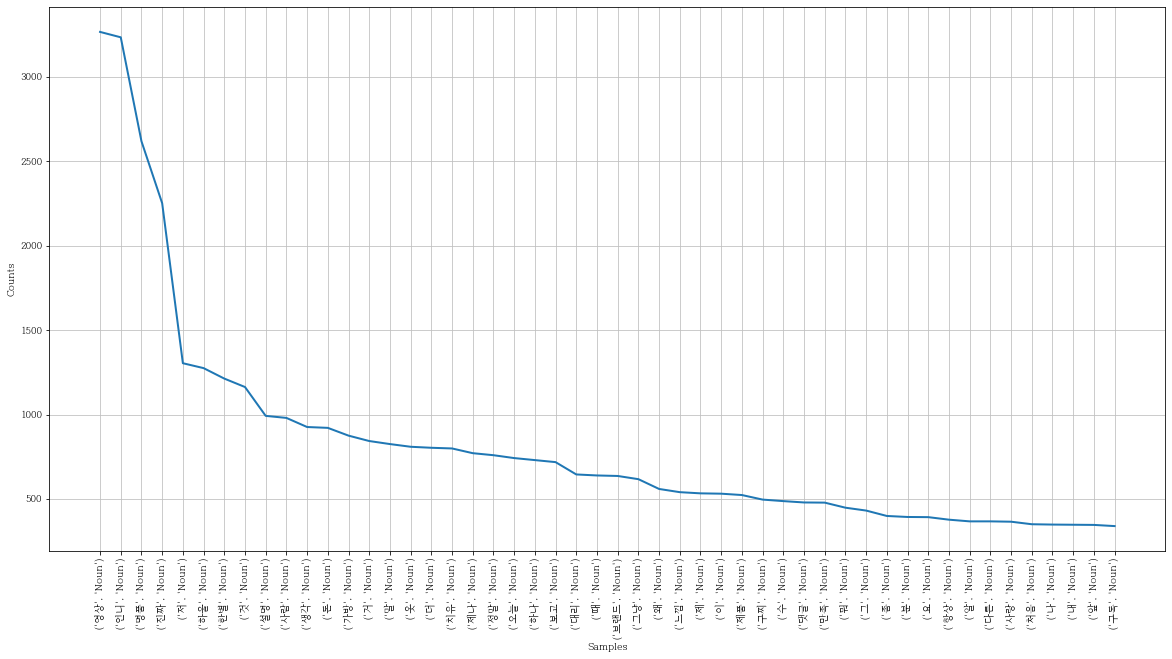

In [181]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

font_fname = 'C:\\Windows\\Fonts\\HANBatang.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

plt.figure(figsize=(20,10))
text.plot(50)

#### We found a lot of mentions on the video authors.
There is much data to be cleaned, but save it for later

## 5. Cleaned Comment(With Punctuation) LDA

## 5-1. Load Data and Modules

In [182]:
import gensim
from gensim import corpora

In [22]:
Cleaned_df = pd.read_csv(path + 'Cleaned_with_Punct_Merged_Youtube_Comments.csv')

In [54]:
video_youtube_luxury_postag = dict()

for row_index, row in Cleaned_df.iterrows():
    if pd.isnull(row.mergedComments) :
        posresult = None
    else :
        posresult = twitter.pos(row.mergedComments)
    video_youtube_luxury_postag[row.videoId] = posresult
    print(len(video_youtube_luxury_postag), '/', len(Cleaned_df.mergedComments), 'completed')
print('DONE!')

1 / 23 completed
2 / 23 completed
3 / 23 completed
4 / 23 completed
5 / 23 completed
6 / 23 completed
7 / 23 completed
8 / 23 completed
9 / 23 completed
10 / 23 completed
11 / 23 completed
12 / 23 completed
13 / 23 completed
14 / 23 completed
15 / 23 completed
16 / 23 completed
17 / 23 completed
18 / 23 completed
19 / 23 completed
20 / 23 completed
21 / 23 completed
22 / 23 completed
23 / 23 completed
DONE!


### 5-2. Create Tokens for Analysis

#### a) Total Comments Token

In [26]:
youtube_luxury_total_comments_tokens = list()

for video, tags in video_youtube_luxury_postag.items():
    youtube_luxury_total_comments_tokens.extend(tags)

In [27]:
# Keep Only Nouns
def Pos_extractor(input_list, pos_type) :
    return(list(word for word in input_list if str(str(pos_type)) in word))

Noun_Only_Youtube_Luxury_Total_Comments = Pos_extractor(youtube_luxury_total_comments_tokens,'Noun')

In [28]:
Noun_Only_Youtube_Luxury_Total_Comments

[('알고리즘', 'Noun'),
 ('아옳이님', 'Noun'),
 ('정말', 'Noun'),
 ('매력', 'Noun'),
 ('옷', 'Noun'),
 ('정말', 'Noun'),
 ('사랑', 'Noun'),
 ('분', 'Noun'),
 ('혹시', 'Noun'),
 ('나중', 'Noun'),
 ('생활', 'Noun'),
 ('팁', 'Noun'),
 ('옷', 'Noun'),
 ('세탁', 'Noun'),
 ('컨텐츠', 'Noun'),
 ('도', 'Noun'),
 ('정말', 'Noun'),
 ('것', 'Noun'),
 ('영상', 'Noun'),
 ('보고', 'Noun'),
 ('여러분', 'Noun'),
 ('거', 'Noun'),
 ('아무나', 'Noun'),
 ('사지', 'Noun'),
 ('욧', 'Noun'),
 ('이분', 'Noun'),
 ('선남선녀', 'Noun'),
 ('커플', 'Noun'),
 ('등급', 'Noun'),
 ('이', 'Noun'),
 ('집', 'Noun'),
 ('옷', 'Noun'),
 ('적대', 'Noun'),
 ('언', 'Noun'),
 ('남', 'Noun'),
 ('옷', 'Noun'),
 ('일인', 'Noun'),
 ('여', 'Noun'),
 ('저', 'Noun'),
 ('매장', 'Noun'),
 ('진짜', 'Noun'),
 ('민트', 'Noun'),
 ('옷', 'Noun'),
 ('한국', 'Noun'),
 ('사이즈', 'Noun'),
 ('하나', 'Noun'),
 ('하나', 'Noun'),
 ('레전드', 'Noun'),
 ('오이', 'Noun'),
 ('진쨔', 'Noun'),
 ('귀엽댴옷', 'Noun'),
 ('정말', 'Noun'),
 ('가격', 'Noun'),
 ('진짜', 'Noun'),
 ('진심', 'Noun'),
 ('구', 'Noun'),
 ('엽다', 'Noun'),
 ('미쳣어', 'Noun'),
 ('무기', 'Noun'),
 

##### Save and Load Token Data

In [254]:
import pickle

In [257]:
## Save pickle
with open("youtube_luxury_total_comments_tokens.pickle","wb") as fw:
    pickle.dump(youtube_luxury_total_comments_tokens, fw)
    
with open("youtube_luxury_total_comments_noun_only_tokens.pickle","wb") as fw:
    pickle.dump(Noun_Only_Youtube_Luxury_Total_Comments, fw)

In [258]:
## Load pickle
youtube_luxury_total_comments_tokens = dict()

with open("youtube_luxury_total_comments_tokens.pickle","rb") as fw:
    youtube_luxury_total_comments_tokens = pickle.load(fw)

Noun_Only_Youtube_Luxury_Total_Comments = list()    
    
with open("youtube_luxury_total_comments_noun_only_tokens.pickle","rb") as fw:
    Noun_Only_Youtube_Luxury_Total_Comments = pickle.load(fw)

#### b) Comment Token by Authors

In [29]:
Cleaned_Agg_By_Author_df= pd.pivot_table(Cleaned_df, values='mergedComments', index='videoAuthor' , aggfunc = lambda x : ''.join(x))

##### Load And Read

In [30]:
Cleaned_Agg_By_Author_df.to_csv(path + 'Agg_Auth_Cleaned_with_Punct.csv')

In [31]:
Cleaned_Agg_By_Author_df = pd.read_csv(path + 'Agg_Auth_Cleaned_with_Punct.csv')

##### Resume Analysis

In [69]:
author_youtube_luxury_postag = dict()
for row_index, row in Cleaned_Agg_By_Author_df.iterrows():
    if pd.isnull(row.mergedComments) :
        posresult = None
    else :
        posresult = twitter.pos(row.mergedComments)
    author_youtube_luxury_postag[row.videoAuthor] = posresult
    print(len(author_youtube_luxury_postag), '/', len(Cleaned_Agg_By_Author_df.mergedComments), 'completed')
print('DONE!')

1 / 8 completed
2 / 8 completed
3 / 8 completed
4 / 8 completed
5 / 8 completed
6 / 8 completed
7 / 8 completed
8 / 8 completed
DONE!


In [70]:
def Pos_extractor(input_list, pos_type) :
    return(list(word for word in input_list if str(str(pos_type)) in word))

In [71]:
Author_Noun_Only_Youtube_Luxury_Comments = dict()

for author, postag in author_youtube_luxury_postag.items():
    Author_Noun_Only_Youtube_Luxury_Comments[author] = Pos_extractor(postag, 'Noun')
    

##### Save and Load

In [40]:
import pickle

In [45]:
## Save pickle
with open("author_youtube_luxury_postag_tokens.pickle","wb") as fw:
    pickle.dump(author_youtube_luxury_postag, fw)
    
with open("author_youtube_luxury_noun_only_tokens.pickle","wb") as fw:
    pickle.dump(Author_Noun_Only_Youtube_Luxury_Comments, fw)

In [47]:
## Load pickle
author_youtube_luxury_postag = dict()

with open("author_youtube_luxury_postag_tokens.pickle","rb") as fw:
    author_youtube_luxury_postag = pickle.load(fw)

Author_Noun_Only_Youtube_Luxury_Comments = dict()    
    
with open("author_youtube_luxury_noun_only_tokens.pickle","rb") as fw:
    Author_Noun_Only_Youtube_Luxury_Comments = pickle.load(fw)

#### c) Comments by Video Token

In [55]:
Video_Noun_Only_Youtube_Luxury_Comments = dict()

for author, postag in video_youtube_luxury_postag.items():
    Video_Noun_Only_Youtube_Luxury_Comments[author] = Pos_extractor(postag, 'Noun')

##### Save and Load

In [339]:
import pickle

In [58]:
## Save pickle
with open("video_youtube_luxury_postag_tokens.pickle","wb") as fw:
    pickle.dump(video_youtube_luxury_postag, fw)
    
with open("video_luxury_noun_only_tokens.pickle","wb") as fw:
    pickle.dump(Video_Noun_Only_Youtube_Luxury_Comments, fw)

In [60]:
## Load pickle
video_youtube_luxury_postag = dict()

with open("video_youtube_luxury_postag_tokens.pickle","rb") as fw:
    video_youtube_luxury_postag = pickle.load(fw)

Video_Noun_Only_Youtube_Luxury_Comments = dict()    
    
with open("video_luxury_noun_only_tokens.pickle","rb") as fw:
    Video_Noun_Only_Youtube_Luxury_Comments = pickle.load(fw)

### 5-3. Run LDA Analysis

In [160]:
import gensim
from gensim import corpora

Lda = gensim.models.ldamodel.LdaModel
from gensim.models import CoherenceModel

In [64]:
# https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#11createthedictionaryandcorpusneededfortopicmodeling
mallet_path = 'mallet-2.0.8\\bin\\mallet' # update this path

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


In [63]:
import os 
os.environ.update({'MALLET_HOME': r'C:/Users/keons/dev/DataAnalysis/YoutubeLuxury/src/mallet-2.0.8/'})

#### a) LDA on Total Comments
Note that this does not produce any meaningful results. Since everyword will occur in the same document.
This is just for Testing purposes

In [289]:
data_total_comments = list() 
for token in Noun_Only_Youtube_Luxury_Total_Comments:
    data_total_comments.append(token[0])

In [294]:
id2word_total_comments = corpora.Dictionary([data_total_comments])
doc_term_matrix = [id2word_total_comments.doc2bow(doc) for doc in [data_total_comments]]

In [296]:
ldamodel = Lda(doc_term_matrix, num_topics=10, id2word = dictionary, passes=50)

In [297]:
pprint(ldamodel.print_topics(num_words=30))

[(0,
  '0.000*"언니" + 0.000*"영상" + 0.000*"명품" + 0.000*"진짜" + 0.000*"저" + 0.000*"것" + '
  '0.000*"생각" + 0.000*"하울" + 0.000*"더" + 0.000*"돈" + 0.000*"제나" + 0.000*"한별" + '
  '0.000*"가방" + 0.000*"정말" + 0.000*"사람" + 0.000*"오늘" + 0.000*"말" + 0.000*"하나" '
  '+ 0.000*"거" + 0.000*"보고" + 0.000*"왜" + 0.000*"옷" + 0.000*"대리" + 0.000*"그냥" '
  '+ 0.000*"브랜드" + 0.000*"분" + 0.000*"때" + 0.000*"치유" + 0.000*"설명" + '
  '0.000*"그"'),
 (1,
  '0.000*"영상" + 0.000*"언니" + 0.000*"명품" + 0.000*"진짜" + 0.000*"하울" + 0.000*"설명" '
  '+ 0.000*"한별" + 0.000*"것" + 0.000*"저" + 0.000*"사람" + 0.000*"생각" + 0.000*"말" '
  '+ 0.000*"더" + 0.000*"치유" + 0.000*"돈" + 0.000*"보고" + 0.000*"제나" + 0.000*"거" '
  '+ 0.000*"가방" + 0.000*"오늘" + 0.000*"대리" + 0.000*"옷" + 0.000*"브랜드" + '
  '0.000*"그냥" + 0.000*"느낌" + 0.000*"만족" + 0.000*"제" + 0.000*"하나" + 0.000*"수" + '
  '0.000*"왜"'),
 (2,
  '0.000*"언니" + 0.000*"영상" + 0.000*"명품" + 0.000*"진짜" + 0.000*"저" + 0.000*"하울" '
  '+ 0.000*"것" + 0.000*"한별" + 0.000*"설명" + 0.000*"생각" + 0.000*"더" + 0.000*"옷" '
  '+ 0

#### b) LDA on by Youtube Author

In [72]:
author_num = dict()
Author_Noun_Only_Lemmatized_Youtube_Luxury = list()

start = 0
for author, comments in Noun_Only_Youtube_Luxury_Author_Comments.items():
    author_num[author] = start
    Author_Noun_Only_Lemmatized_Youtube_Luxury.append([word[0] for word in comments])
    start += 1

In [75]:
# Dictionary
id2word_luxury_author_comments = corpora.Dictionary(Author_Noun_Only_Lemmatized_Youtube_Luxury)

# Term Document Frequency / Corpus
dtm_youtube_luxury_author_comments= [id2word_luxury_author_comments.doc2bow(doc) for doc in Author_Noun_Only_Lemmatized_Youtube_Luxury]

In [350]:
ldamodel_youtube_luxury_author_comments = Lda(corpus=dtm_youtube_luxury_author_comments, update_every=1, num_topics=14, id2word = id2word_luxury_author_comments, passes=10)

In [351]:
pprint(ldamodel_youtube_luxury_author_comments.print_topics(num_words=30))

[(0,
  '0.013*"가방" + 0.008*"에르메스" + 0.008*"명품" + 0.007*"악어" + 0.007*"거" + '
  '0.007*"사람" + 0.006*"가죽" + 0.005*"왜" + 0.004*"진짜" + 0.004*"장갑" + 0.004*"저" + '
  '0.004*"그냥" + 0.004*"말" + 0.003*"뭐" + 0.003*"영상" + 0.003*"분" + 0.003*"나" + '
  '0.003*"돈" + 0.003*"브랜드" + 0.003*"생각" + 0.002*"걸" + 0.002*"것" + 0.002*"이" + '
  '0.002*"하나" + 0.002*"내" + 0.002*"댓글" + 0.002*"보고" + 0.002*"수" + 0.002*"제품" + '
  '0.002*"때"'),
 (1,
  '0.029*"제나" + 0.016*"언니" + 0.015*"진짜" + 0.015*"영상" + 0.009*"저" + 0.009*"사람" '
  '+ 0.008*"돈" + 0.008*"엄마" + 0.007*"것" + 0.007*"옷" + 0.007*"거" + 0.007*"명품" + '
  '0.006*"더" + 0.006*"생각" + 0.006*"하울" + 0.005*"때" + 0.005*"말" + 0.005*"나" + '
  '0.005*"이" + 0.005*"오늘" + 0.005*"딸" + 0.004*"보고" + 0.004*"원피스" + 0.004*"왜" + '
  '0.004*"수" + 0.004*"공부" + 0.004*"댓글" + 0.004*"내" + 0.004*"살" + 0.003*"뭐"'),
 (2,
  '0.054*"언니" + 0.028*"영상" + 0.022*"진짜" + 0.013*"오늘" + 0.010*"하울" + 0.010*"즐" '
  '+ 0.009*"헤" + 0.009*"하" + 0.009*"명품" + 0.008*"저" + 0.007*"옷" + 0.006*"것" + '
  '0.006*"더" + 0.0

#### b-2) Find Optimal LDA Model for Youtube Author Data

In [76]:
author_comments_model_list, author_comments_coherence_values = compute_coherence_values( 
    dictionary=id2word_luxury_author_comments, 
    corpus=dtm_youtube_luxury_author_comments, 
    texts=Author_Noun_Only_Lemmatized_Youtube_Luxury, 
    start=2, limit=40, step=6)

##### Save and Load LDA Data

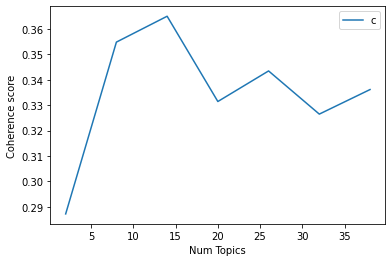

In [90]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, author_comments_coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [91]:
for m, cv in zip(x, author_comments_coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2872
Num Topics = 8  has Coherence Value of 0.3548
Num Topics = 14  has Coherence Value of 0.365
Num Topics = 20  has Coherence Value of 0.3314
Num Topics = 26  has Coherence Value of 0.3435
Num Topics = 32  has Coherence Value of 0.3265
Num Topics = 38  has Coherence Value of 0.3361


In [105]:
author_comments_optimal_model = author_comments_model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=20))

[(0,
  '0.037*"진짜" + 0.024*"사람" + 0.023*"거" + 0.020*"저" + 0.016*"나" + 0.015*"내" + '
  '0.015*"댓글" + 0.013*"때" + 0.012*"수" + 0.010*"이" + 0.010*"뭐" + 0.009*"살" + '
  '0.009*"꼭" + 0.009*"정도" + 0.008*"마음" + 0.008*"지금" + 0.008*"말" + 0.007*"것" + '
  '0.007*"데" + 0.007*"집"'),
 (1,
  '0.039*"하울" + 0.030*"명품" + 0.026*"더" + 0.023*"저" + 0.020*"것" + 0.016*"옷" + '
  '0.014*"때" + 0.013*"이" + 0.012*"뭔가" + 0.012*"거" + 0.011*"좀" + 0.010*"안" + '
  '0.010*"정말" + 0.009*"눈" + 0.009*"요" + 0.009*"수" + 0.009*"가요" + 0.009*"느낌" + '
  '0.009*"전" + 0.008*"가격"'),
 (2,
  '0.128*"언니" + 0.051*"영상" + 0.043*"진짜" + 0.026*"오늘" + 0.017*"원피스" + 0.014*"즐" '
  '+ 0.014*"옷" + 0.013*"헤" + 0.013*"하" + 0.011*"사랑" + 0.010*"찰떡" + 0.010*"역시" '
  '+ 0.009*"로" + 0.009*"정보" + 0.009*"가방" + 0.009*"신발" + 0.008*"소개" + '
  '0.008*"보고" + 0.008*"대리" + 0.008*"완전"'),
 (3,
  '0.041*"가방" + 0.023*"명품" + 0.017*"가죽" + 0.017*"왜" + 0.016*"에르메스" + 0.014*"거" '
  '+ 0.013*"그냥" + 0.009*"악어" + 0.008*"디자인" + 0.008*"분" + 0.008*"여자" + '
  '0.008*"별로" + 0.008

#### c) LDA on by Youtube Video

In [78]:
video_num = dict()
Video_Noun_Only_Lemmatized_Youtube_Luxury = list()

start = 0
for video, comments in Video_Noun_Only_Youtube_Luxury_Comments.items():
    video_num[video] = start
    Video_Noun_Only_Lemmatized_Youtube_Luxury.append([word[0] for word in comments])
    start += 1


In [79]:
# Create Dictionary
id2word_luxury_video_comments = corpora.Dictionary(Video_Noun_Only_Lemmatized_Youtube_Luxury)

# Term Document Frequency / Corpus
dtm_luxury_video_comments = [id2word_luxury_video_comments.doc2bow(text) for text in Video_Noun_Only_Lemmatized_Youtube_Luxury]

In [344]:
ldamodel_youtube_luxury_video_comments = Lda(corpus=dtm_luxury_video_comments, update_every=1, num_topics=4, id2word = id2word_luxury_video_comments, passes=10)

In [345]:
pprint(ldamodel_youtube_luxury_video_comments.print_topics(num_words=30))

[(0,
  '0.039*"언니" + 0.025*"진짜" + 0.019*"영상" + 0.017*"가방" + 0.011*"구찌" + 0.011*"저" '
  '+ 0.009*"한별" + 0.008*"명품" + 0.007*"대리" + 0.007*"오늘" + 0.007*"더" + 0.006*"것" '
  '+ 0.006*"만족" + 0.006*"신발" + 0.006*"거" + 0.005*"샤넬" + 0.005*"정말" + '
  '0.004*"보고" + 0.004*"제" + 0.004*"사람" + 0.004*"하울" + 0.004*"말" + 0.004*"이" + '
  '0.004*"때" + 0.003*"사랑" + 0.003*"생각" + 0.003*"선물" + 0.003*"요" + 0.003*"눈" + '
  '0.003*"용"'),
 (1,
  '0.042*"언니" + 0.024*"영상" + 0.019*"진짜" + 0.012*"오늘" + 0.010*"옷" + 0.010*"명품" '
  '+ 0.008*"저" + 0.007*"것" + 0.006*"하울" + 0.006*"치유" + 0.006*"원피스" + '
  '0.005*"가방" + 0.005*"때" + 0.005*"거" + 0.005*"보고" + 0.005*"더" + 0.005*"하" + '
  '0.004*"정말" + 0.004*"항상" + 0.004*"즐" + 0.004*"사람" + 0.004*"브랜드" + 0.004*"시계" '
  '+ 0.004*"제" + 0.004*"헤" + 0.004*"사랑" + 0.004*"이" + 0.004*"말" + 0.004*"역시" + '
  '0.003*"로"'),
 (2,
  '0.030*"영상" + 0.028*"명품" + 0.021*"언니" + 0.016*"진짜" + 0.013*"한별" + 0.013*"하울" '
  '+ 0.011*"설명" + 0.011*"것" + 0.010*"저" + 0.009*"사람" + 0.009*"생각" + 0.008*"돈" '
  '+ 0.0

#### c-2) Find Optimal LDA Model for Youtube Video Data

In [80]:
video_comments_model_list, video_comments_coherence_values = compute_coherence_values( 
    dictionary=id2word_luxury_video_comments, 
    corpus=dtm_luxury_video_comments, 
    texts=Video_Noun_Only_Lemmatized_Youtube_Luxury, 
    start=2, limit=40, step=6)

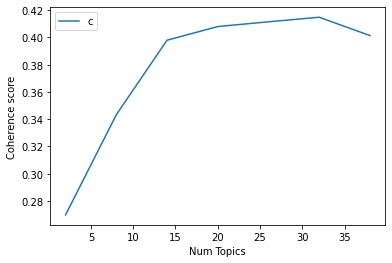

In [89]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, video_comments_coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [175]:
for m, cv in zip(x, video_comments_coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2696
Num Topics = 8  has Coherence Value of 0.3432
Num Topics = 14  has Coherence Value of 0.398
Num Topics = 20  has Coherence Value of 0.408
Num Topics = 26  has Coherence Value of 0.4115
Num Topics = 32  has Coherence Value of 0.4149
Num Topics = 38  has Coherence Value of 0.4014


In [179]:
video_comments_optimal_model = video_comments_model_list[3]
model_topics = video_comments_optimal_model.show_topics(formatted=False)
pprint(video_comments_optimal_model.print_topics(num_words=20))

[(0,
  '0.034*"것" + 0.031*"왜" + 0.026*"저" + 0.026*"그냥" + 0.025*"보고" + 0.022*"분" + '
  '0.022*"이" + 0.021*"수" + 0.020*"다른" + 0.017*"처음" + 0.016*"더" + 0.015*"안" + '
  '0.014*"게" + 0.013*"그" + 0.012*"가격" + 0.012*"한번" + 0.012*"사람" + 0.011*"좀" + '
  '0.010*"구매" + 0.010*"느낌"'),
 (1,
  '0.080*"옷" + 0.044*"진짜" + 0.041*"저" + 0.026*"브랜드" + 0.020*"정보" + 0.019*"해" + '
  '0.019*"항상" + 0.019*"알" + 0.016*"개" + 0.016*"것" + 0.013*"요" + 0.011*"스타일" + '
  '0.011*"뭘" + 0.011*"저런" + 0.010*"위" + 0.009*"티" + 0.009*"때" + 0.009*"정도" + '
  '0.009*"하트" + 0.008*"부분"'),
 (2,
  '0.063*"원피스" + 0.034*"생일" + 0.031*"주원" + 0.031*"선물" + 0.030*"축하" + '
  '0.024*"민영" + 0.024*"아옳이님" + 0.022*"명품" + 0.016*"사람" + 0.016*"샤넬" + '
  '0.015*"남편" + 0.013*"쇼핑" + 0.013*"찰떡" + 0.013*"목걸이" + 0.013*"가격" + '
  '0.012*"사이즈" + 0.011*"수" + 0.010*"번" + 0.009*"티파니" + 0.009*"소개"'),
 (3,
  '0.065*"사람" + 0.055*"말" + 0.041*"명품" + 0.036*"돈" + 0.036*"댓글" + 0.035*"생각" + '
  '0.019*"때" + 0.018*"그냥" + 0.016*"거" + 0.014*"그" + 0.013*"좀" + 0.013*"나" + '


## 6. Results

In [100]:
import gensim
from gensim import corpora

Lda = gensim.models.ldamodel.LdaModel
from gensim.models import CoherenceModel

import matplotlib as mpl
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm

import pyLDAvis
import pyLDAvis.gensim

In [129]:
def format_topics_document(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)





In [162]:
# https://neptune.ai/blog/pyldavis-topic-modelling-exploration-tool-that-every-nlp-data-scientist-should-know

def convertldaGenToldaMallet(mallet_model):
    model_gensim = Lda(
        id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
        alpha=mallet_model.alpha, eta=0,
    )
    model_gensim.state.sstats[...] = mallet_model.wordtopics
    model_gensim.sync_state()
    return model_gensim

### 6-1. Youtube Comments by Author

#### Dominant Topic for Each Document

In [130]:
df_author_topic_sents_keywords = format_topics_document(
    ldamodel=author_comments_optimal_model, 
    corpus=dtm_youtube_luxury_author_comments, 
    texts=Author_Noun_Only_Lemmatized_Youtube_Luxury)

# Format
df_author_dominant_topic = df_author_topic_sents_keywords.reset_index()
df_author_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

In [151]:
# Switch author_num key values to replace document vlaues

doc_author_dict = {y:x for x,y in author_num.items()}

In [152]:
df_author_dominant_topic.Document_No = df_author_dominant_topic.Document_No.replace(doc_author_dict)

In [153]:
df_author_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,Jena Lee 제나리,7.0,0.3634,"제나, 엄마, 영상, 돈, 딸, 낭비, 자기, 부모, 공부, 더","[하나, 금쪽, 딸, 무엇, 자식, 부족함, 전하, 리오, 제나, 투맨, 브랜드, ..."
1,로즈하ROSEHA,2.0,0.5367,"언니, 영상, 진짜, 오늘, 원피스, 즐, 옷, 헤, 하, 사랑","[네, 로즈하, 로, 하, 영상, 혹시, 설리, 원피스, 중고, 팔지, 구, 문의,..."
2,세레브스H,3.0,0.5784,"가방, 명품, 가죽, 왜, 에르메스, 거, 그냥, 악어, 디자인, 여자","[직원, 자기, 산, 거, 같은듸, 초콜릿, 상자, 줄, 천, 백만원, 네이버, 언..."
3,아옳이,2.0,0.3699,"언니, 영상, 진짜, 오늘, 원피스, 즐, 옷, 헤, 하, 사랑","[알고리즘, 아옳이님, 정말, 매력, 옷, 정말, 사랑, 분, 혹시, 나중, 생활,..."
4,이수진,7.0,0.3738,"제나, 엄마, 영상, 돈, 딸, 낭비, 자기, 부모, 공부, 더","[제나, 하울, 영상, 왜, 요즘, 별로, 돈, 수준, 뿐, 우리, 유튜브, 현실,..."
5,치유 cheeu,5.0,0.3299,"영상, 언니, 설명, 명품, 치유, 진짜, 구독, 그냥, 오늘, 하나","[백인, 모델, 우리나라, 디자이너, 의상, 남, 클럽, 편견, 용, 투맨, 레깅스..."
6,한별Hanbyul,6.0,0.3651,"영상, 한별, 언니, 명품, 진짜, 가방, 구찌, 하울, 오늘, 대리","[언니, 덕, 말론, 슐저, 득템, 햇, 맘, 명품, 하나, 주시, 면안, 이번, ..."
7,헤이즐 Heizle,2.0,0.5060,"언니, 영상, 진짜, 오늘, 원피스, 즐, 옷, 헤, 하, 사랑","[언니, 핑크, 머리띠, 진짜, 찰떡, 취향, 졸귀, 텐션, 업업업, 하울, 젤루,..."


#### Dominant Document for Each Topic

In [127]:
author_sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_author_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    author_sent_topics_sorteddf_mallet = pd.concat([author_sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
author_sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
author_sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
author_sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,2.0,0.5367,"언니, 영상, 진짜, 오늘, 원피스, 즐, 옷, 헤, 하, 사랑","[네, 로즈하, 로, 하, 영상, 혹시, 설리, 원피스, 중고, 팔지, 구, 문의,..."
1,3.0,0.5784,"가방, 명품, 가죽, 왜, 에르메스, 거, 그냥, 악어, 디자인, 여자","[직원, 자기, 산, 거, 같은듸, 초콜릿, 상자, 줄, 천, 백만원, 네이버, 언..."
2,5.0,0.3299,"영상, 언니, 설명, 명품, 치유, 진짜, 구독, 그냥, 오늘, 하나","[백인, 모델, 우리나라, 디자이너, 의상, 남, 클럽, 편견, 용, 투맨, 레깅스..."
3,6.0,0.3651,"영상, 한별, 언니, 명품, 진짜, 가방, 구찌, 하울, 오늘, 대리","[언니, 덕, 말론, 슐저, 득템, 햇, 맘, 명품, 하나, 주시, 면안, 이번, ..."
4,7.0,0.3738,"제나, 엄마, 영상, 돈, 딸, 낭비, 자기, 부모, 공부, 더","[제나, 하울, 영상, 왜, 요즘, 별로, 돈, 수준, 뿐, 우리, 유튜브, 현실,..."


#### Visualize

In [163]:
author_youtube_model_to_feed_pyldavis = convertldaGenToldaMallet(author_comments_optimal_model)

In [166]:
pyLDAvis.enable_notebook()
p1 = pyLDAvis.gensim.prepare(author_youtube_model_to_feed_pyldavis, dtm_youtube_luxury_author_comments, id2word_luxury_author_comments)
p1

c:\users\keons\dev\dataanalysis\youtubeluxury\luxuryvenv\lib\site-packages\pyLDAvis\_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
c:\users\keons\dev\dataanalysis\youtubeluxury\luxuryvenv\lib\site-packages\pyLDAvis\_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
c:\users\keons\dev\dataanalysis\youtubeluxury\luxuryvenv\lib\site-packages\pyLDAvis\_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.138034  0.143092       1        1  21.713723
4      0.193123 -0.240192       2        1  17.943131
0      0.205298 -0.012476       3        1  17.573241
5     -0.273284  0.073387       4        1  13.405040
6     -0.220642  0.016245       5        1  13.103084
2     -0.236878 -0.050075       6        1   7.119089
7      0.030592 -0.221591       7        1   5.347404
3      0.163757  0.291609       8        1   3.795289, topic_info=     Term         Freq        Total Category  logprob  loglift
646    언니  3110.000000  3110.000000  Default  30.0000  30.0000
681    영상  3239.000000  3239.000000  Default  29.0000  29.0000
4892   한별  1168.000000  1168.000000  Default  28.0000  28.0000
865    제나   721.000000   721.000000  Default  27.0000  27.0000
337    명품  2574.000000  2574.000000  Default  26.0000  26.0000
...   ...          ...          ...      ...      ...      ...
31      개    25.766274   204.378471   Topic8  -5.1672   1.2005
254     등    22.793241    80.008803   Topic8  -5.2898   2.0157
2437   직원    22.793241   123.069566   Topic8  -5.2898   1.5851
888     줄    22.793241   132.101624   Topic8  -5.2898   1.5143
450   브랜드    22.793241   633.833884   Topic8  -5.2898  -0.0539

[751 rows x 6 columns], token_table=       Topic      Freq Term
term                       
0          3  0.996232   가게
1          1  0.839335   가격
1          4  0.161707   가격
3574       5  1.006529  가까이
1110       4  0.142079   가방
...      ...       ...  ...
1862       1  0.997179    효
1097       1  0.997179    후
3568       1  0.997179    훨
10086      6  1.011620   흘수
1104       1  0.997179    힐

[922 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 1, 6, 7, 3, 8, 4])

### 6-2. Youtube Comments by Video

#### Dominant Topic for Each Document

In [180]:
df_video_topic_sents_keywords = format_topics_document(
    ldamodel=video_comments_optimal_model, 
    corpus=dtm_luxury_video_comments, 
    texts=Video_Noun_Only_Lemmatized_Youtube_Luxury)

# Format
df_video_dominant_topic = df_video_topic_sents_keywords.reset_index()
df_video_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

In [181]:
# Switch author_num key values to replace document vlaues

doc_video_dict = {y:x for x,y in video_num.items()}

In [182]:
df_video_dominant_topic.Document_No = df_video_dominant_topic.Document_No.replace(doc_video_dict)

In [183]:
df_video_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,-YVOz7DNVVw,2.0,0.2544,"원피스, 생일, 주원, 선물, 축하, 민영, 아옳이님, 명품, 사람, 샤넬","[알고리즘, 아옳이님, 정말, 매력, 옷, 정말, 사랑, 분, 혹시, 나중, 생활,..."
1,2fRNGhdDH6Y,14.0,0.3282,"치유, 브랜드, 돌체앤가바나, 화면, 돌체, 영상, 클럽, 색감, 필터, 자막","[백인, 모델, 우리나라, 디자이너, 의상, 남, 클럽, 편견, 용, 투맨, 레깅스..."
2,7GTFm9Nt1vs,10.0,0.2536,"언니, 오늘, 이, 나, 요, 역시, 내, 드레스, 혹시, 집","[제, 옷장, 좀, 대신, 가방, 저, 거, 거, 우리, 엄마, 그사세, 느낌, 저..."
3,7t4iEnWE4NU,8.0,0.3702,"언니, 하울, 즐, 헤, 진짜, 헤이즐, 앞머리, 명품, 쇼핑, 샤넬","[언니, 핑크, 머리띠, 진짜, 찰떡, 취향, 졸귀, 텐션, 업업업, 하울, 젤루,..."
4,8djsxhjeKCk,5.0,0.4681,"가방, 에르메스, 가죽, 악어, 거, 명품, 장갑, 언박싱, 존나, 가치","[직원, 자기, 산, 거, 같은듸, 초콜릿, 상자, 줄, 천, 백만원, 네이버, 언..."
5,AoaA67lq2Ao,12.0,0.2472,"언니, 구찌, 가방, 진짜, 한별, 신발, 저, 만족, 대리, 구두","[언니, 덕, 말론, 슐저, 득템, 햇, 맘, 명품, 하나, 주시, 면안, 이번, ..."
6,DOTqBttmdzw,11.0,0.2822,"시계, 오늘, 치유, 롤렉스, 항상, 로렉스, 저, 선물, 정보, 데이","[시계, 사려, 오늘, 백화점, 대기, 롤렉스, 롤렉스, 롤롤, 치유, 사업, 자수..."
7,GtSNABWyJFE,13.0,0.4498,"언니, 영상, 오늘, 하, 신발, 로, 정보, 공주, 소개, 명품","[네, 로즈하, 로, 하, 영상, 혹시, 설리, 원피스, 중고, 팔지, 구, 문의,..."
8,Kq593FmydBQ,16.0,0.2822,"제나, 엄마, 딸, 낭비, 하울, 나, 부모, 집, 애, 부모님","[하나, 금쪽, 딸, 무엇, 자식, 부족함, 전하, 리오, 제나, 투맨, 브랜드, ..."
9,L9FbEuJLnQ4,15.0,0.2878,"매장, 치유, 고객, 직원, 영상, 무시, 셀러, 쇼핑, 손님, 응대","[딩, 내, 기준, 명품, 뭐, 효율, 명품, 사면, 사치, 우왕, 언니, 나, 만..."


#### Dominant Document for Each Topic

In [184]:
video_sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_video_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    video_sent_topics_sorteddf_mallet = pd.concat([video_sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
video_sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
video_sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
video_sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,2.0,0.2602,"원피스, 생일, 주원, 선물, 축하, 민영, 아옳이님, 명품, 사람, 샤넬","[버버리, 운동, 마트, 때, 댕, 보이, 플랩, 베이지, 구매, 백화점, 가격, ..."
1,4.0,0.2773,"여기, 요, 부자, 우리, 인생, 왜, 사회, 사고, 살, 질투","[제나, 패션, 쪽, 진로, 가면, 돈, 센스, 상품, 눈, 사람, 제나, 물건, ..."
2,5.0,0.4681,"가방, 에르메스, 가죽, 악어, 거, 명품, 장갑, 언박싱, 존나, 가치","[직원, 자기, 산, 거, 같은듸, 초콜릿, 상자, 줄, 천, 백만원, 네이버, 언..."
3,6.0,0.2250,"명품, 한별, 영상, 하울, 브랜드, 디올, 하나, 돈, 설명, 디자인","[한별, 한별, 명품, 하울, 찍, 때, 마다, 한별, 오늘, 여러분, 정말, 정말..."
4,7.0,0.3161,"돈, 공부, 저, 살, 내, 본인, 생각, 마음, 수, 인생","[오, 구독, 햇, 엄마, 다이아몬드, 수저, 취향, 금수, 타령, 한탄, 날해, ..."
5,8.0,0.4149,"언니, 하울, 즐, 헤, 진짜, 헤이즐, 앞머리, 명품, 쇼핑, 샤넬","[언니, 금, 더, 계속, 금도, 말, 막말, 즐, 영상, 영상, 메이크업, 데, ..."
6,9.0,0.4489,"명품, 설명, 영상, 언니, 치유, 하나, 하울, 정말, 생각, 진짜","[치유, 진짜, 설명, 명품, 강의, 다른, 유튜버, 나, 거, 것, 왜, 배치, ..."
7,10.0,0.2536,"언니, 오늘, 이, 나, 요, 역시, 내, 드레스, 혹시, 집","[제, 옷장, 좀, 대신, 가방, 저, 거, 거, 우리, 엄마, 그사세, 느낌, 저..."
8,11.0,0.2822,"시계, 오늘, 치유, 롤렉스, 항상, 로렉스, 저, 선물, 정보, 데이","[시계, 사려, 오늘, 백화점, 대기, 롤렉스, 롤렉스, 롤롤, 치유, 사업, 자수..."
9,12.0,0.4677,"언니, 구찌, 가방, 진짜, 한별, 신발, 저, 만족, 대리, 구두","[개인, 이, 동영상, 명품, 소개, 리뷰, 브랜드, 이름, 상표, 동영상, 에나,..."


#### Visualize

In [185]:
video_youtube_model_to_feed_pyldavis = convertldaGenToldaMallet(video_comments_optimal_model)

In [186]:
pyLDAvis.enable_notebook()
p2 = pyLDAvis.gensim.prepare(video_youtube_model_to_feed_pyldavis, dtm_luxury_video_comments, id2word_luxury_video_comments)
p2

c:\users\keons\dev\dataanalysis\youtubeluxury\luxuryvenv\lib\site-packages\pyLDAvis\_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
c:\users\keons\dev\dataanalysis\youtubeluxury\luxuryvenv\lib\site-packages\pyLDAvis\_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
c:\users\keons\dev\dataanalysis\youtubeluxury\luxuryvenv\lib\site-packages\pyLDAvis\_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
17    -0.005529  0.173388       1        1  13.213159
0     -0.168688 -0.045483       2        1  11.522483
9      0.207218  0.169240       3        1  10.200953
3     -0.021534  0.056232       4        1  10.189615
10     0.141092 -0.228058       5        1   7.043372
6      0.215480  0.228007       6        1   6.805388
19    -0.160412 -0.049987       7        1   5.410906
7     -0.151316 -0.015691       8        1   5.088990
1     -0.072829 -0.036839       9        1   4.917214
12     0.115936 -0.149834      10        1   4.162558
16    -0.076056 -0.108602      11        1   3.350629
18     0.038310  0.041466      12        1   3.019658
4     -0.189314 -0.093923      13        1   2.642941
15    -0.054834  0.167857      14        1   2.135311
13     0.216292 -0.122534      15        1   2.028359
8      0.229953 -0.126021      16        1   1.960471
14    -0.078763  0.155078      17        1   1.745931
2      0.023476 -0.026435      18        1   1.571812
5     -0.130570  0.045442      19        1   1.538698
11    -0.077911 -0.033302      20        1   1.451550, topic_info=     Term         Freq        Total Category  logprob  loglift
581    언니  3116.000000  3116.000000  Default  30.0000  30.0000
610    영상  3236.000000  3236.000000  Default  29.0000  29.0000
291    명품  2575.000000  2575.000000  Default  28.0000  28.0000
3665   한별  1182.000000  1182.000000  Default  27.0000  27.0000
807    진짜  2176.000000  2176.000000  Default  26.0000  26.0000
...   ...          ...          ...      ...      ...      ...
764     제    14.894731   524.611452  Topic20  -4.7542   0.6709
811     집    12.908767   159.181299  Topic20  -4.8973   1.7204
782     좀    13.901750   397.019349  Topic20  -4.8232   0.8806
291    명품    13.901750  2575.823459  Topic20  -4.8232  -0.9894
106     꼭    12.908767   199.289063  Topic20  -4.8973   1.4957

[1898 rows x 6 columns], token_table=       Topic      Freq Term
term                       
1          2  0.638558   가격
1          3  0.201243   가격
1          7  0.003870   가격
1         10  0.061921   가격
1         18  0.092881   가격
...      ...       ...  ...
975        3  0.150784   힐링
975        5  0.644260   힐링
975       15  0.123369   힐링
975       20  0.082246   힐링
10028      5  0.996473   힝힝

[2644 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[18, 1, 10, 4, 11, 7, 20, 8, 2, 13, 17, 19, 5, 16, 14, 9, 15, 3, 6, 12])